# Regularized Method for Regression

Some examples:

* [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Least Absolute Shrinkage and Selection Operator (LASSO)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

## Ridge Regression
Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

$\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

***

Shows the effect of collinearity in the coefficients of an estimator.

Ridge Regression is the estimator used in this example. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

## LASSO Regression

A linear model that estimates sparse coefficients.

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.

## Elastic Net

A linear regression model trained with L1 and L2 prior as regularizer. 

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$





***

# Outliers Impact 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

Coefficient Estimate:  [0.47134857]


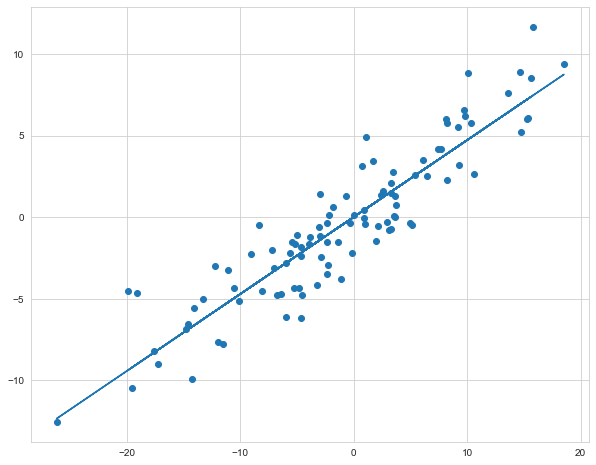

In [15]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Coefficient Estimate: ", lr.coef_)

In [16]:
idx = rng.argmax()
y_gen[idx] = 200
#idx = rng.argmin()
#y_gen[idx] = -200

Coefficient Estimate:  [0.92796845]


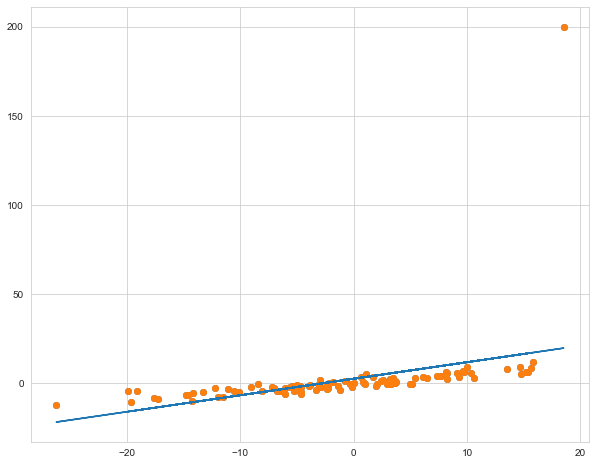

In [18]:
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);

o_lr = LinearRegression(normalize=True)
o_lr.fit(rng.reshape(-1, 1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen);
plt.plot(rng, o_model_pred);
print("Coefficient Estimate: ", o_lr.coef_)

## Ridge Regression

In [19]:
from sklearn.linear_model import Ridge

Coefficient Estimate:  [0.54586379]


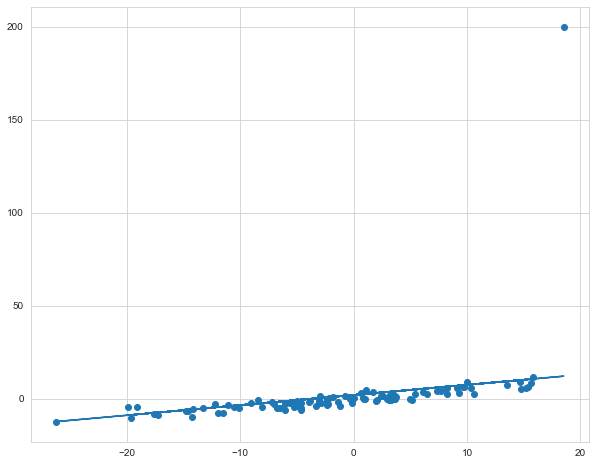

In [21]:
ridge_mod = Ridge(alpha=0.7, normalize=True)
ridge_mod.fit(rng.reshape(-1, 1), y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_model_pred);
print("Coefficient Estimate: ", ridge_mod.coef_)

## Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

Coefficient Estimate:  [0.48530263]


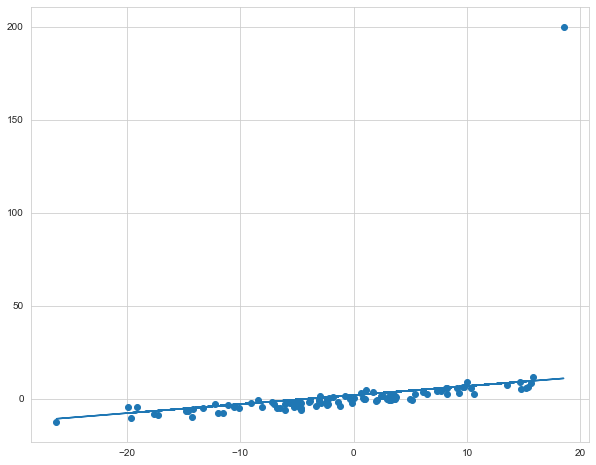

In [23]:
lasso_mod = Lasso(alpha=0.4, normalize=True)
lasso_mod.fit(rng.reshape(-1, 1), y_gen)
lasso_model_pred = lasso_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_model_pred);
print("Coefficient Estimate: ", lasso_mod.coef_)

## Elastic Net Regression

In [24]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [0.30194505]


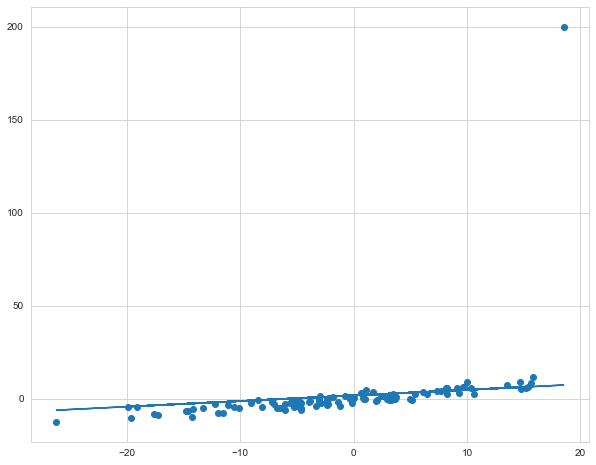

In [25]:
en_mod = ElasticNet(alpha=0.04, normalize=True)
en_mod.fit(rng.reshape(-1, 1), y_gen)
en_model_pred = en_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, en_model_pred);
print("Coefficient Estimate: ", en_mod.coef_)

***

# Summary

[Question in StackExchange](https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge)

**When should I use Lasso, Ridge or Elastic Net?**

Ridge regression can't zero out coefficients; You either end up including all the coefficients in the model, or none of them. 

LASSO does both parameter shrinkage and variable selection automatically. 

If some of your covariates are highly correlated, you may want to look at the Elastic Net instead of the LASSO.

# Other References

1. [The Lasso Page](http://statweb.stanford.edu/~tibs/lasso.html)

2. [A simple explanation of the Lasso and Least Angle Regression](http://statweb.stanford.edu/~tibs/lasso/simple.html)

3. [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

***